# NLP (Natural Language Processing) 

    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below. Or reference the full video lecture**

In [1]:
# Import the libraries
# Pandas is high-performance, easy-to-use data structures and data analysis tools for the Python programming language
import pandas as pd

# Numpy is the fundamental package for scientific computing with Python
import numpy as np

# Matplotlib is used for graphs
import matplotlib.pyplot as plt

# seaborn Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
import seaborn as sns

# %matplotlib inline is magic command. This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib
%matplotlib inline

## Get the Data

Dataset: [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.
The file contains a collection of more than 5 thousand SMS phone messages

Use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [1]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\Kartik\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
# To know length of messages data set
print(len(messages))

5574


In [6]:
# Print messages
for mess_no, messages in enumerate(messages[:10]):
    print(mess_no, messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

messages.head()

In [10]:
# To view first 5 rows of our dataset
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Describe function provide descriptive statistics Output table of data 
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
# GroupBy Label 
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
# Creating a new column length to get length of each message
messages['length']=messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


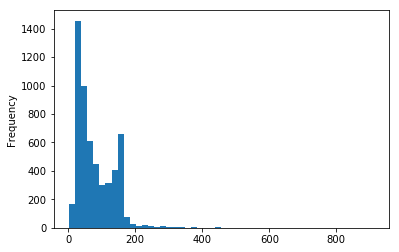

In [19]:
messages['length'].plot.hist(bins=50)

In [21]:
# Describe function provide descriptive statistics Output table of data 
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
defmessages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [27]:
# Importing string library to work with strings
import string

In [28]:
# Stopwords library is to remove very common words, ('the', 'a', etc..).
from nltk.corpus import stopwords

In [29]:
# Function to remove punctuation & stop words & Tokenization of list
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 




In [31]:
# Calling function text_process
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [32]:
# Function to vectorize each message
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [35]:
print(len(bow_transformer.vocabulary_))

11425


In [36]:
mess4 = messages['message'][3]

In [37]:
mess4

'U dun say so early hor... U c already then say...'

In [38]:
bow4 = bow_transformer.transform([mess4])

In [39]:
bow_transformer.get_feature_names()[4068] 

'U'

In [40]:
# Each vector will have as many dimensions as there are unique words in the SMS corpus. 
# We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.
# .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages
messages_bow=bow_transformer.transform(messages['message'])

In [42]:
messages_bow.nnz

50548

In [44]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [45]:
# After the counting, the term weighting and normalization can be done with TF-IDF,
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
tfidf_transformer= TfidfTransformer().fit(messages_bow)

In [48]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [49]:
# To transform the entire bag-of-words corpus into TF-IDF corpus at once:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [50]:
messages_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [52]:
# Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB

In [53]:
# Specifying a variable to Naive Bayes classifier ()
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [55]:
# Predicting test set
all_pred= spam_detect_model.predict(messages_tfidf)

In [56]:
all_pred


array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], 
      dtype='<U4')

In [57]:
# Importing train_test_split() for the Cross Validation
from sklearn.cross_validation import train_test_split

In [58]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [59]:
# Pipeline function to apply all tranformation and model at once
from sklearn.pipeline import Pipeline

In [60]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)), # Count vectorize the string 
    ('tfidf',TfidfTransformer()), # Tfidf transformation
    ('classifier',MultinomialNB()) # Naive Bayes Model
])

In [61]:
# Creating model using train set
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000217A34CE400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [62]:
# Predicting test set
redictions=pipeline.predict(msg_test)

In [68]:
# Importing metrics function to see our prediction accuracy
from sklearn.metrics import classification_report

In [69]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1457
       spam       1.00      0.69      0.82       215

avg / total       0.96      0.96      0.96      1672

